In [18]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Data Collection - Acquisition/Merge

In [19]:
df1=pd.read_csv('Accident_Information.csv', encoding ='ISO-8859-1')
df1.head()
warnings.filterwarnings('ignore')


C:\Users\Joe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df2 = pd.read_csv("Vehicle_Information.csv", encoding ='ISO-8859-1')
df2.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [10]:
df=df1.merge(df2, left_on= 'Accident_Index', right_on="Accident_Index")
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


# Data Shape

In [15]:
print(df.shape[0], "rows")
print(df.shape[1], 'columns')

2058408 rows
57 columns


# Data Quality

In [25]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058408 entries, 0 to 2058407
Data columns (total 57 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               2058408 non-null  object 
 1   1st_Road_Class                               2058408 non-null  object 
 2   1st_Road_Number                              2058407 non-null  float64
 3   2nd_Road_Class                               1230471 non-null  object 
 4   2nd_Road_Number                              2039481 non-null  float64
 5   Accident_Severity                            2058408 non-null  object 
 6   Carriageway_Hazards                          2058408 non-null  object 
 7   Date                                         2058408 non-null  object 
 8   Day_of_Week                                  2058408 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  2

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


In [79]:
col = []
for i in df.columns:
    col.append(i)
col

['Accident_Index',
 '1st_Road_Class',
 '1st_Road_Number',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Accident_Severity',
 'Carriageway_Hazards',
 'Date',
 'Day_of_Week',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Control',
 'Junction_Detail',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'LSOA_of_Accident_Location',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Year_x',
 'InScotland',
 'Age_Band_of_Driver',
 'Age_of_Vehicle',
 'Driver_Home_Area_Type',
 'Driver_IMD_Decile',
 'Engine_Capacity_.CC.',
 'Hit_Object_in_Carriageway',
 'Hit_Object_off_Carriageway',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'mak

In [87]:
df['Latitude']

0          51.520075
1          51.525301
2          51.482442
3          51.495752
4          51.515540
             ...    
2058403    55.005033
2058404    55.005033
2058405    55.048803
2058406    54.989597
2058407    55.310151
Name: Latitude, Length: 2058408, dtype: float64

In [132]:
ar =df[df['Towing_and_Articulation']=="Articulated vehicle"]
ar2 =df[df['Age_Band_of_Driver'] != "Data missing or out of range"]
ar =ar[ar['Age_Band_of_Driver'] != "Data missing or out of range"]

(array([408773., 424291., 331194.,  87222., 165772., 195291., 226532.,
         51996.,   3559.,   1007.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

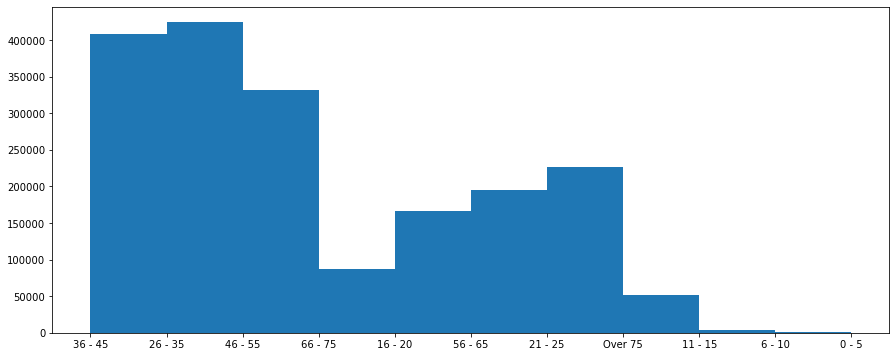

In [133]:
plt.figure(figsize=(15,6))
plt.hist(ar2['Age_Band_of_Driver'])

In [114]:
lats= df['Latitude'].to_numpy()
lons = df['Longitude'].to_numpy()


<Figure size 432x288 with 0 Axes>

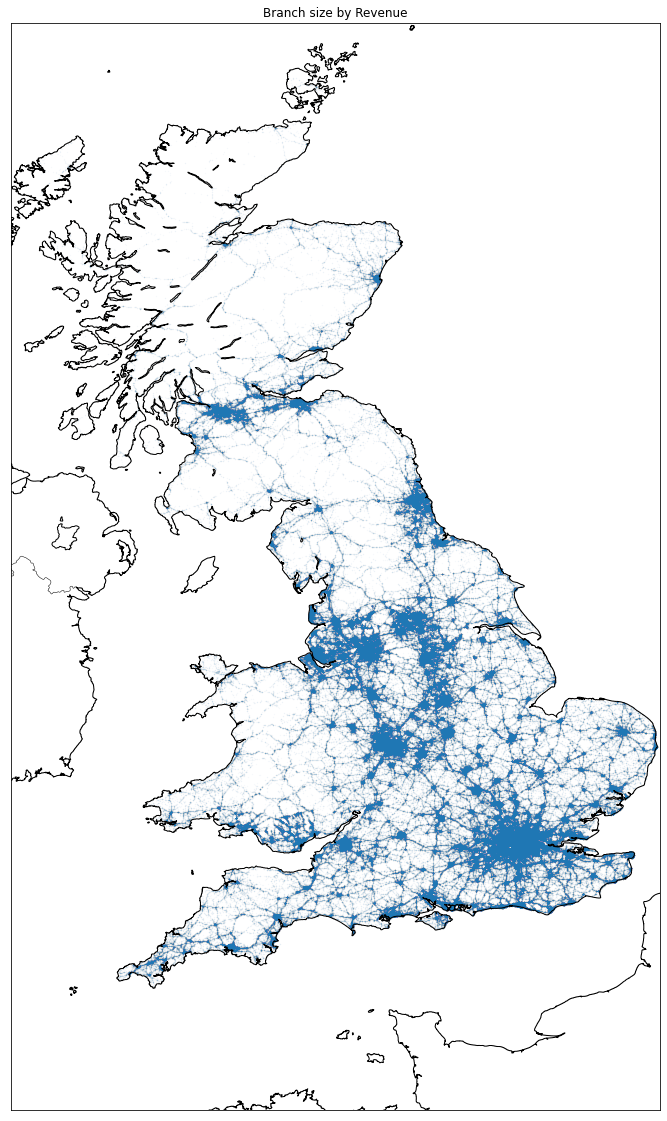

In [138]:
plt.clf()
plt.figure(figsize=(40,20))
m = Basemap(projection='mill',
            llcrnrlat=48.6529114,
            urcrnrlat=59.5773638,
            llcrnrlon=-7.1857997,
            urcrnrlon=1.808907,
            lat_ts=20,
            resolution='f')
m.drawcoastlines()
m.drawcountries()
#m.fillcontinents(lake_color='aqua')
# draw parallels and meridians.
#m.scatter(lons, lats, latlon=True, c = gp, s = rev, cmap ='Reds', alpha =.5)
#m.drawmapboundary(fill_color='aqua')

x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, marker ='.', s=.0007)
plt.title("Branch size by Revenue")
plt.show()